In [2]:
import numpy as np
import pandas as pd
import os
import datetime
from matplotlib import pyplot as plt

In [3]:
def read_txt(filename):
    save_ls = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.split(',')
            for val in line:
                save_ls.append(val)
    return save_ls

# read in sensor data
hum2 = read_txt('./collection2/CS109a_humidity.txt')
hum3 = read_txt('./collection3/CS109a_humidity.txt')
hum4 = read_txt('./collection4/CS109a_humidity.txt')
hum5 = read_txt('./collection5/CS109a_humidity.txt')

In [4]:
# generate start times (every 30 minutes) from initial start dates
oct29 = datetime.datetime(2019, 10, 29, hour=12, minute=42)
nov3 = datetime.datetime(2019, 11, 3, hour=9, minute=30)
nov6 = datetime.datetime(2019, 11, 6, hour=21, minute=13)
nov11 = datetime.datetime(2019, 11, 11, hour=12, minute=50)

def compute_time_int(start_dt, hum):
    dates = [start_dt]
    for i in range(len(hum)-1): 
        dates.append(dates[i] + datetime.timedelta(minutes=30))
    df = pd.DataFrame({'date': dates,'hum': hum})
    df.drop(df.tail(1).index,inplace=True)
    return df
    

df1 = compute_time_int(oct29, hum2)
df2 = compute_time_int(nov3, hum3)
df3 = compute_time_int(nov6, hum4)
df4 = compute_time_int(nov11, hum5)
# drop last empty row

In [7]:
df1.iloc[-1,:].date - df2.iloc[0,:].date


Timedelta('-1 days +04:42:00')

In [4]:
for df in [df1,df2,df3,df4]:
    print(df.shape)

(196, 2)
(167, 2)
(167, 2)
(198, 2)


In [5]:
def convert_to_float(dfs):
    for df in dfs:
        df.hum = [float(i) for i in df.hum]
        
dfs = [df1,df2,df3,df4]   
convert_to_float(dfs)

In [6]:
humidity = pd.concat([df1,df2,df3,df4], axis=0)

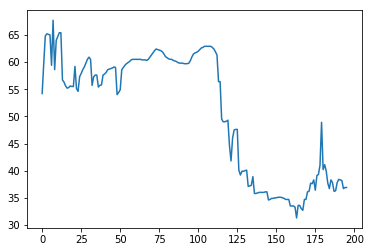

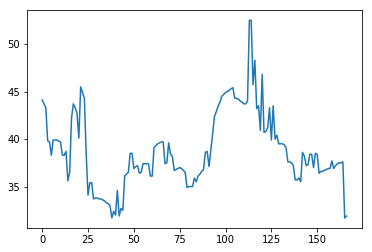

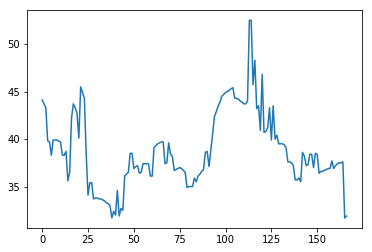

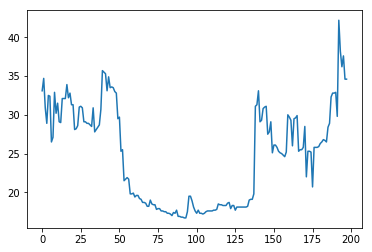

In [10]:
for df in dfs:
    plt.plot(df.hum) #np.arange(humidity.shape[0]),
    plt.show()

In [22]:
for i in humidity.date:
    print(i.hour, i.minute)


12 42
13 12
13 42
14 12
14 42
15 12
15 42
16 12
16 42
17 12
17 42
18 12
18 42
19 12
19 42
20 12
20 42
21 12
21 42
22 12
22 42
23 12
23 42
0 12
0 42
1 12
1 42
2 12
2 42
3 12
3 42
4 12
4 42
5 12
5 42
6 12
6 42
7 12
7 42
8 12
8 42
9 12
9 42
10 12
10 42
11 12
11 42
12 12
12 42
13 12
13 42
14 12
14 42
15 12
15 42
16 12
16 42
17 12
17 42
18 12
18 42
19 12
19 42
20 12
20 42
21 12
21 42
22 12
22 42
23 12
23 42
0 12
0 42
1 12
1 42
2 12
2 42
3 12
3 42
4 12
4 42
5 12
5 42
6 12
6 42
7 12
7 42
8 12
8 42
9 12
9 42
10 12
10 42
11 12
11 42
12 12
12 42
13 12
13 42
14 12
14 42
15 12
15 42
16 12
16 42
17 12
17 42
18 12
18 42
19 12
19 42
20 12
20 42
21 12
21 42
22 12
22 42
23 12
23 42
0 12
0 42
1 12
1 42
2 12
2 42
3 12
3 42
4 12
4 42
5 12
5 42
6 12
6 42
7 12
7 42
8 12
8 42
9 12
9 42
10 12
10 42
11 12
11 42
12 12
12 42
13 12
13 42
14 12
14 42
15 12
15 42
16 12
16 42
17 12
17 42
18 12
18 42
19 12
19 42
20 12
20 42
21 12
21 42
22 12
22 42
23 12
23 42
0 12
0 42
1 12
1 42
2 12
2 42
3 12
3 42
4 12
4 42
5 12
5 4